# Introduction

Purpose of this notebook is to understand if there are certain graphs in which the non-backtracking vector changes any order of the random walk backtracking vector. We will first utilize a brute force approach.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import classes.nb_general as NB_G 
import classes.visual_tools as VS
import scipy.linalg as la

In [3]:
class GraphLibrary:
    
    def __init__(self, direc=''):
        self.direc = direc

    def save_graph(self,G,graph_descrip):
        """ Given a graph and description, save it in our home directory. """
        
        with open('{}/graph_descriptions.txt'.format(self.direc), 'r+') as log_:
            i = len(log_.readlines())
            # Record our graph & Description
            log_.write("Graph {}: {}\n".format(i,graph_descrip))
            log_.close()

        nx.write_gml(G,r"{}/graph_{}.gml".format(self.direc,i),str)
        
    def load_graph(self, k):
        """ Given an index, load the specific graph. """
        
        with open('{}/graph_descriptions.txt'.format(self.direc), 'r+') as log_:    
            
            descrip_ = log_.readlines()[k]
            
        G = nx.read_gml(r"{}/graph_{}.gml".format(self.direc,k))
        
        return G, descrip_ 

The code below tests the graph $K_{2,4}$ and compares the normal page rank vector, non-back tracking naive implementation, and then the consolidated Springer implementation.

Regular: 
[0.24324261 0.24324261 0.1283787  0.1283787  0.1283787  0.1283787 ]
Non backtracking: 
[0.25  0.25  0.125 0.125 0.125 0.125]
Non backtracking Springer: 
[0.24561404 0.24561404 0.12719298 0.12719298 0.12719298 0.12719298]
[2 3 4 5 0 1]
[2 3 4 5 0 1]
[2 3 4 5 0 1]


/Users/tylerjones/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


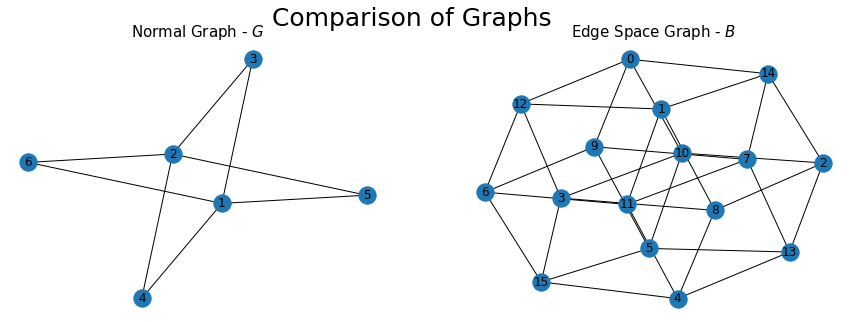

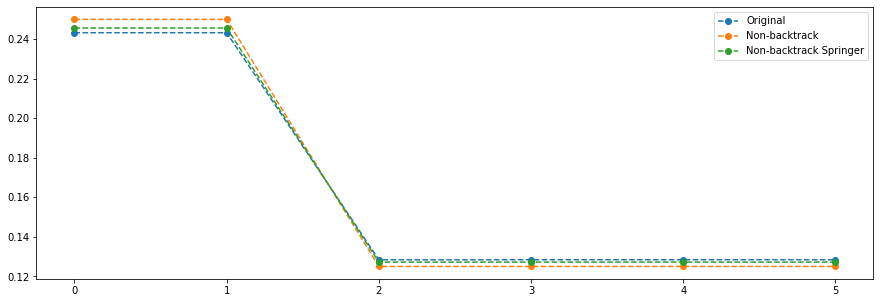

In [3]:
# Create graph and relevant matrices
G = nx.Graph()
G.add_nodes_from(range(1,7))
G.add_edges_from([[1,3],[1,4],[1,5],[1,6],[2,3],[2,4],[2,5],[2,6]])
A = nx.adjacency_matrix(G).todense()
C, B = NB_G.to_edge_space(G,graph=False, B = True)
S, T = NB_G.create_s_t(G)
D_hat = np.diag(np.array(B.sum(axis=1)).reshape((B.shape[1],)))
a_ = .9

# Get page rank of the edge space
pr_e = np.array(list(nx.pagerank(nx.Graph(B,alpha=a_)).values()))

# 'Spring Paper Eqn' 
eqn = lambda alpha: la.solve(np.eye(B.shape[0])-alpha*B.T@la.solve(D_hat,np.eye(D_hat.shape[0])),(1-alpha)/A.shape[0]*T.T@(la.solve(T@T.T,np.eye(T.shape[0])))@np.ones(T.T.shape[1]))

# Get page rank of the vertex space
pr_v = np.array(list(nx.pagerank(nx.Graph(G,alpha=a_)).values()))

# Get projection of edge space to vertex space of appropriate page rank vectors
pr_ = T@pr_e
pr_2 = T@eqn(a_)

# Print Page Rank values
print("Regular: \n{}".format(pr_v))
print("Non backtracking: \n{}".format(pr_))
print("Non backtracking Springer: \n{}".format(pr_2))

# Print Ordering
print(np.argsort(pr_v))
print(np.argsort(pr_))
print(np.argsort(pr_2))

# Plot Results
plt.figure(figsize=(15,5))
plt.suptitle('Comparison of Graphs\n', fontsize=25)
plt.subplot(121)
plt.title("Normal Graph - $G$", fontsize=15)
nx.draw(G,with_labels=True)
plt.subplot(122)
plt.title("Edge Space Graph - $B$", fontsize=15)
nx.draw(nx.from_numpy_array(B), with_labels=True)
plt.show()

DOMAIN = np.arange(0, len(pr_v), 1)
plt.figure(figsize=(15,5))
plt.plot(DOMAIN, pr_v, 'o--', label='Original')
plt.plot(DOMAIN, pr_,  'o--', label='Non-backtrack')
plt.plot(DOMAIN, pr_2,  'o--', label='Non-backtrack Springer')
plt.legend(loc='best')
plt.show()

# Function to compare random graphs and their 3 respective page rank vectors

In the Springer equation we get some singular matrices, although I'm not quite sure which ones currently.

In [4]:
def comparison(V_m=10, m=25, plot=False, a_=.9):
    """ Run comparison on non-backtracking random walks vs random walks """
    

    for i in range(m):
        
        # Randomly choose vertex and edge count
        V = np.random.randint(3, V_m)
        E = np.random.randint(V, int(V*(V-1)/2)+1)

        # Create graph and relevant matrices
        G = nx.gnm_random_graph(V,E)
        A = nx.adjacency_matrix(G).todense()
        C, B = NB_G.to_edge_space(G,graph=False, B = True)
        S, T = NB_G.create_s_t(G)
        D_hat = np.diag(np.array(B.sum(axis=1)).reshape((B.shape[1],)))
        
        # Get page rank of the edge space
        pr_e = np.array(list(nx.pagerank(nx.Graph(B,alpha=a_)).values()))
        
        # 'Spring Paper Eqn' 
        eqn = lambda alpha: la.solve(np.eye(B.shape[0])-alpha*B.T@la.solve(D_hat,np.eye(D_hat.shape[0])),(1-alpha)/A.shape[0]*T.T@(la.solve(T@T.T,np.eye(T.shape[0])))@np.ones(T.T.shape[1]))
        
        # Get page rank of the vertex space
        pr_v = np.array(list(nx.pagerank(nx.Graph(G,alpha=a_)).values()))
        
        # Get projection of edge space to vertex space of appropriate page rank vectors
        pr_ = T@pr_e
        pr_2 = T@eqn(a_)
            
        # Print Page Rank values
        print("Regular: \n{}".format(pr_v))
        print("Non backtracking: \n{}".format(pr_))
        print("Non backtracking Springer: \n{}".format(pr_2))
        
        # Print Ordering
        print(np.argsort(pr_v))
        print(np.argsort(pr_))
        print(np.argsort(pr_2))
        
        # Plot Results
        if plot:
            plt.figure(figsize=(15,5))
            plt.suptitle('Comparison of Graphs\n', fontsize=25)
            plt.subplot(121)
            plt.title("Normal Graph - $G$", fontsize=15)
            nx.draw(G,with_labels=True)
            plt.subplot(122)
            plt.title("Edge Space Graph - $B$", fontsize=15)
            nx.draw(nx.from_numpy_array(B), with_labels=True)
            plt.show()
            
            DOMAIN = np.arange(0, len(pr_v), 1)
            plt.figure(figsize=(15,5))
            plt.plot(DOMAIN, pr_v, 'o--', label='Original')
            plt.plot(DOMAIN, pr_,  'o--', label='Non-backtrack')
            plt.plot(DOMAIN, pr_2,  'o--', label='Non-backtrack Springer')
            plt.legend(loc='best')
            plt.show()
            
            DOMAIN = np.arange(0, len(pr_e), 1)
            plt.figure(figsize=(15,5))
            plt.title("Edge Space Page Rank")
            plt.plot(DOMAIN, pr_e, 'o--', label='Naive Networkx')
            plt.plot(DOMAIN, eqn(a_),  'o--', label='Springer backtrack')
            plt.legend(loc='best')
            plt.show()
            
            DOMAIN = np.arange(0, len(pr_e), 1)
            plt.figure(figsize=(15,5))
            plt.title("Edge Space Page Rank")
            plt.plot(DOMAIN, S@pr_v, 'o--', label='Normal Pagerank')
            plt.legend(loc='best')
            plt.show()

            
        print("\n")

Regular: 
[0.33333333 0.33333333 0.33333333]
Non backtracking: 
[0.33333333 0.33333333 0.33333333]
Non backtracking Springer: 
[0.33333333 0.33333333 0.33333333]
[0 1 2]
[0 1 2]
[0 1 2]


/Users/tylerjones/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


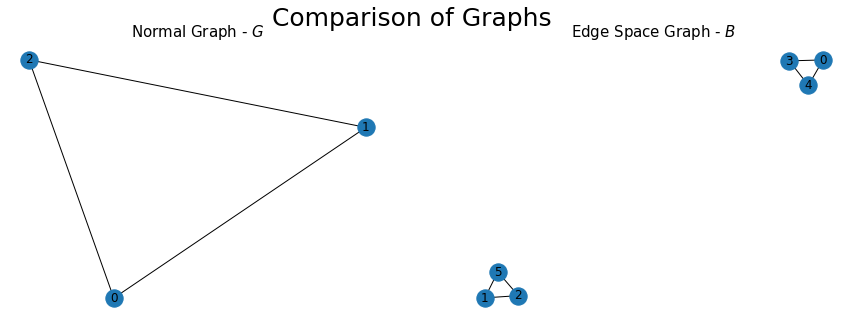

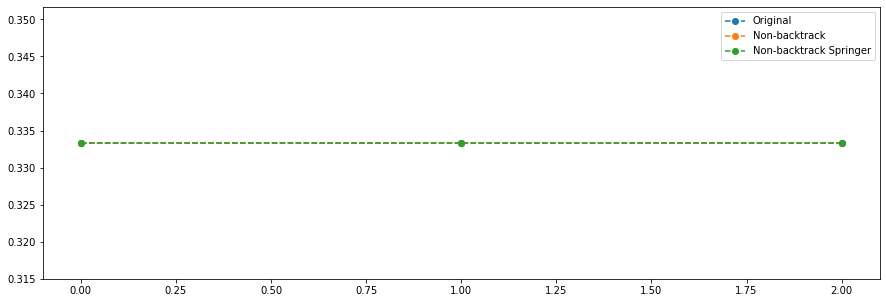

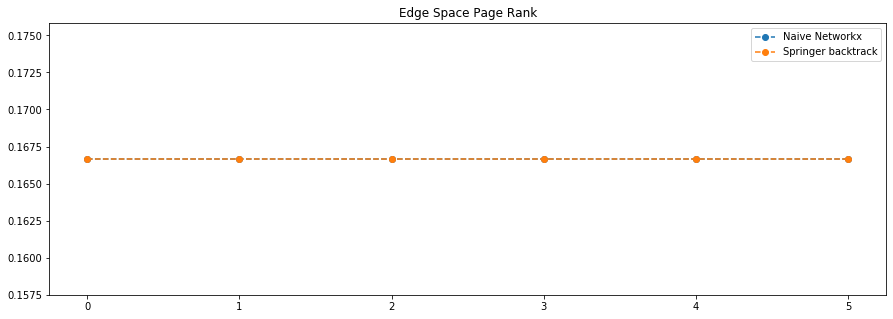

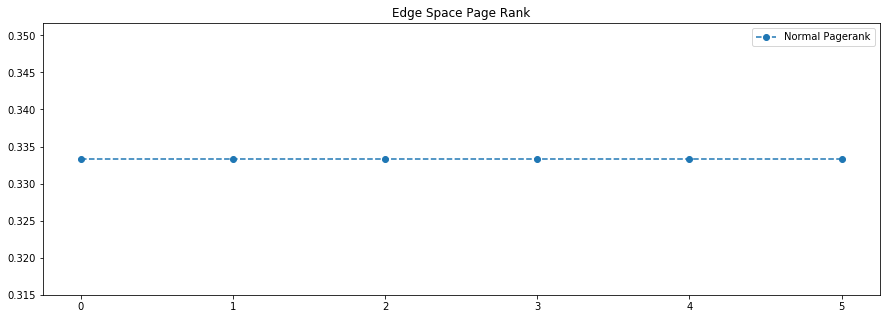



Regular: 
[0.17985051 0.22040645 0.13890513 0.1404937  0.1404937  0.17985051]
Non backtracking: 
[0.1850263  0.25274646 0.12961724 0.12379185 0.12379185 0.1850263 ]
Non backtracking Springer: 
[0.18072021 0.22347818 0.13798775 0.13854683 0.13854683 0.18072021]
[2 3 4 5 0 1]
[3 4 2 0 5 1]
[2 3 4 0 5 1]


/Users/tylerjones/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


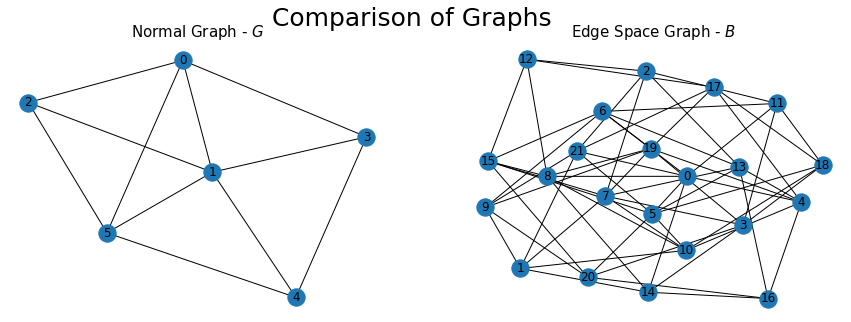

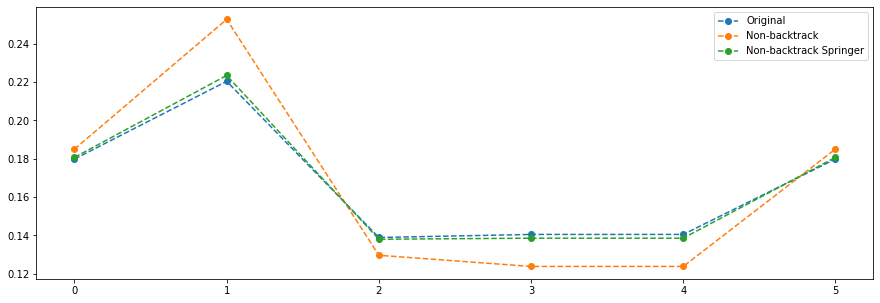

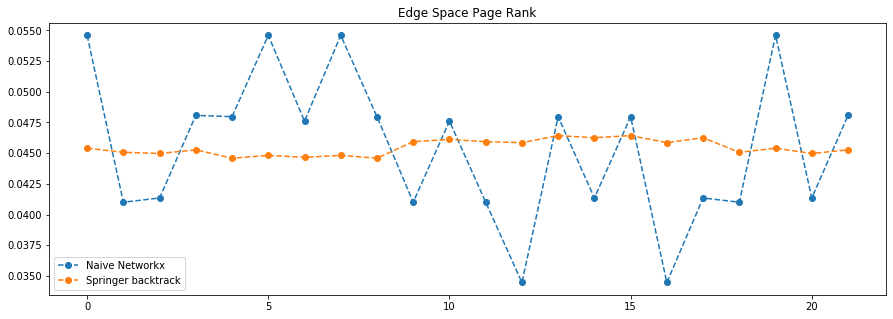

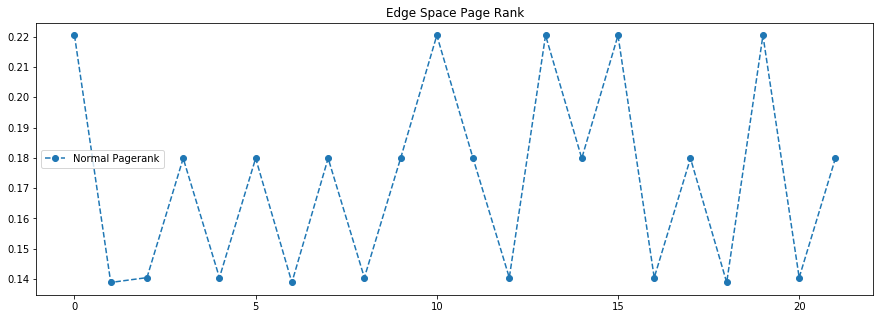

LinAlgError: Matrix is singular.

In [6]:
comparison(V_m=10, plot=True)

Seems to be a correlation or some rule where our normal page rank vector $\hat{x}$ has it's entries get slightly smaller or bigger based on some rule. It looks to be somewhat correlated with the degree of the vertex, but not exactly...

In [4]:
def run(G, a_=.95):
    A = nx.adjacency_matrix(G).todense()
    C, B = NB_G.to_edge_space(G,graph=False, B = True)
    S, T = NB_G.create_s_t(G)
    D_hat = np.diag(np.array(B.sum(axis=1)).reshape((B.shape[1],)))
    D = np.array(A.sum(axis=1)).reshape(A.shape[1],)

    # Get page rank of the edge space
    pr_e = np.array(list(nx.pagerank(nx.Graph(B,alpha=a_)).values()))
    
    # 'Spring Paper Eqn' 
    eqn = lambda alpha: la.solve(np.eye(B.shape[0])-alpha*B.T@la.solve(D_hat,np.eye(D_hat.shape[0])),(1-alpha)/A.shape[0]*T.T@(la.solve(T@T.T,np.eye(T.shape[0])))@np.ones(T.T.shape[1]))

    # Get page rank of the vertex space
    pr_v = np.array(list(nx.pagerank(nx.Graph(G,alpha=a_)).values()))
    pr_v_w = pr_v/D
    

    # Get projection of edge space to vertex space of appropriate page rank vectors
    pr_ = T@pr_e
    pr_w = pr_/D
    pr_2 = T@eqn(a_)
    pr_2_w = pr_2/D


    print("Normal Page Rank Variance: {}".format(np.var(pr_v)))
    print("NBTRW Page Rank Variance: {}".format(np.var(pr_)))
    
    # Print Page Rank values
    print("Regular: \n{}".format(pr_v))
    print("Non backtracking: \n{}".format(pr_))
    print("Non backtracking Springer: \n{}".format(pr_2))

    # Print Ordering
    print(np.argsort(pr_v))
    print(np.argsort(pr_))
    print(np.argsort(pr_2))

    plt.figure(figsize=(15,5))
    plt.suptitle('Comparison of Graphs\n', fontsize=25)
    plt.subplot(121)
    plt.title("Normal Graph - $G$", fontsize=15)
    nx.draw(G,with_labels=True)
    plt.subplot(122)
    plt.title("Edge Space Graph - $B$", fontsize=15)
    nx.draw(nx.from_numpy_array(B), with_labels=True)
    plt.show()

    DOMAIN = np.arange(0, len(pr_v), 1)
    plt.figure(figsize=(15,5))
    plt.title("Normal Vertex Space")
    plt.plot(DOMAIN, pr_v, 'o--', label='Original')
    plt.plot(DOMAIN, pr_,  'o--', label='Non-backtrack')
    plt.plot(DOMAIN, pr_2,  'o--', label='Non-backtrack Springer')
    plt.legend(loc='best')
    plt.show()

    DOMAIN = np.arange(0, len(pr_v), 1)
    plt.figure(figsize=(15,5))
    plt.title("Weighted Vertex Space")
    plt.plot(DOMAIN, pr_v_w, 'o--', label='Original')
    plt.plot(DOMAIN, pr_w,  'o--', label='Non-backtrack')
    plt.plot(DOMAIN, pr_2_w,  'o--', label='Non-backtrack Springer')
    plt.legend(loc='best')
    plt.show()
    
    DOMAIN = np.arange(0, len(pr_e), 1)
    plt.figure(figsize=(15,5))
    plt.title("Edge Space Page Rank")
    plt.plot(DOMAIN, pr_e, 'o--', label='Naive Networkx')
    plt.plot(DOMAIN, eqn(a_),  'o--', label='Springer backtrack')
    plt.legend(loc='best')
    plt.show()

    DOMAIN = np.arange(0, len(pr_e), 1)
    plt.figure(figsize=(15,5))
    plt.title("Edge Space Page Rank")
    plt.plot(DOMAIN, S@pr_v, 'o--', label='Normal Pagerank')
    plt.legend(loc='best')
    plt.show()

Graph 0: K_2_4 graph



/Users/tylerjones/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


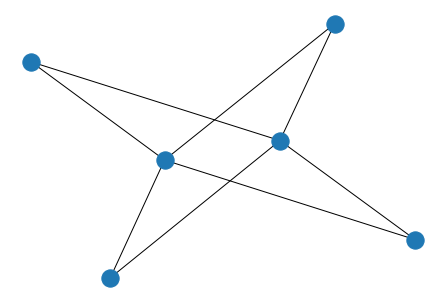

Normal Page Rank Variance: 0.002931937471811561
NBTRW Page Rank Variance: 0.0034722222222222233
Regular: 
[0.24324261 0.24324261 0.1283787  0.1283787  0.1283787  0.1283787 ]
Non backtracking: 
[0.25  0.25  0.125 0.125 0.125 0.125]
Non backtracking Springer: 
[0.24786325 0.24786325 0.12606838 0.12606838 0.12606838 0.12606838]
[2 3 4 5 0 1]
[2 3 4 5 0 1]
[2 3 4 5 0 1]


/Users/tylerjones/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


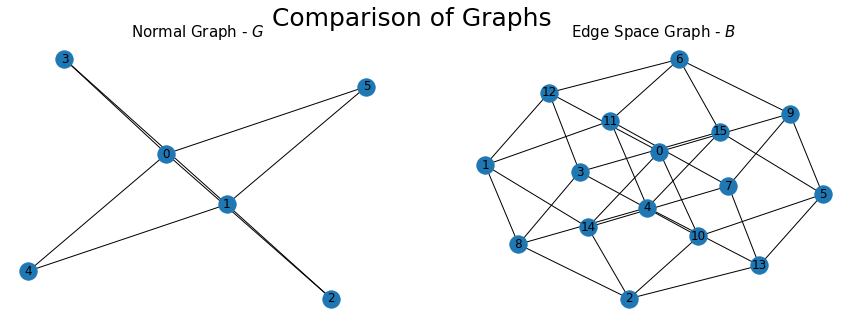

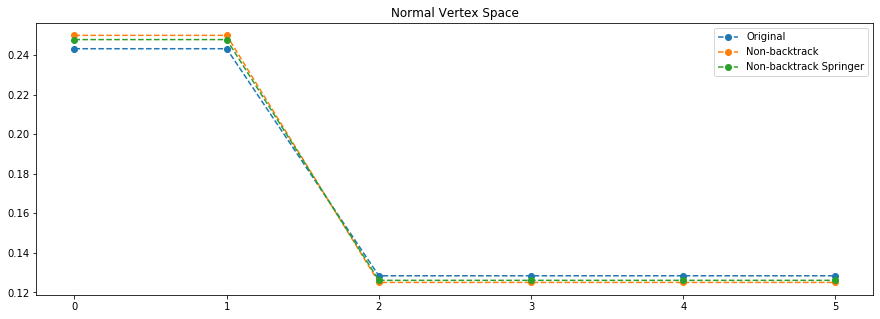

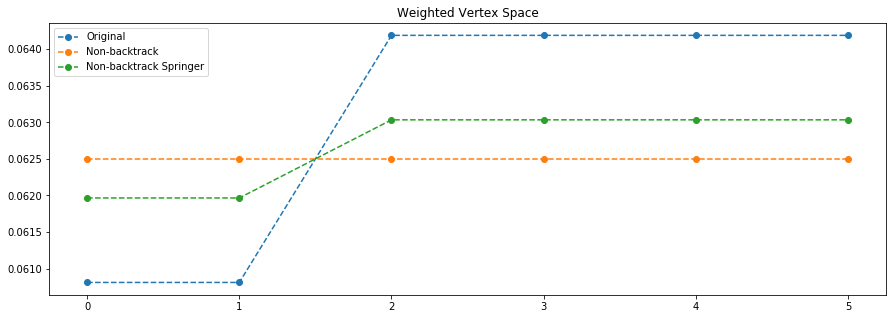

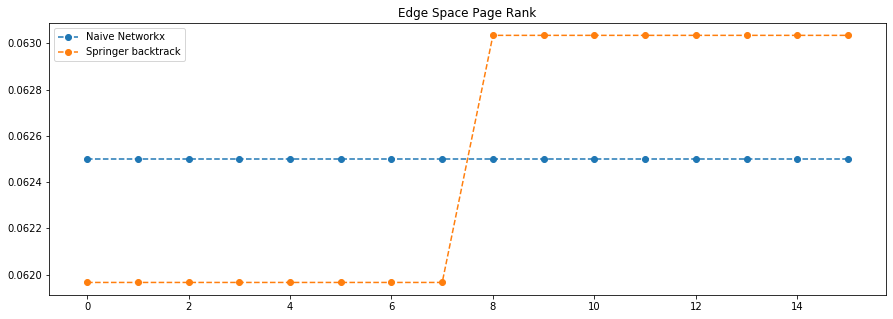

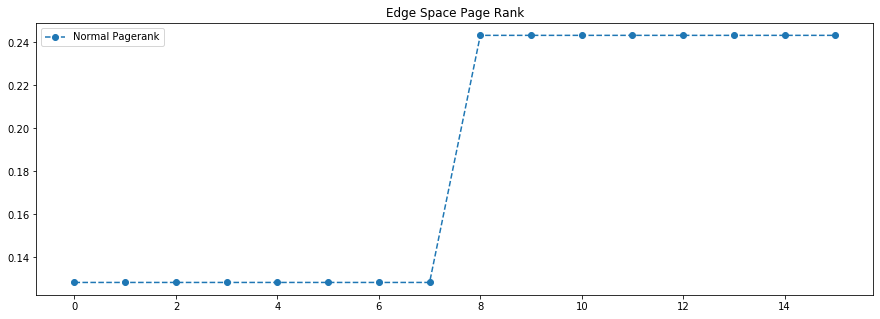



Graph 1: Cycles connected on singular node.



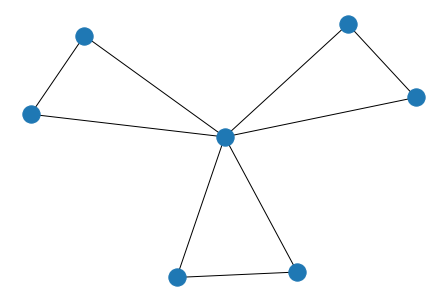

Normal Page Rank Variance: 0.004840866424325053
NBTRW Page Rank Variance: 0.012439829246209875
Regular: 
[0.31328366 0.11445272 0.11445272 0.11445272 0.11445272 0.11445272
 0.11445272]
Non backtracking: 
[0.41605849 0.09732359 0.09732359 0.09732359 0.09732359 0.09732359
 0.09732359]
Non backtracking Springer: 
[0.32840866 0.11193189 0.11193189 0.11193189 0.11193189 0.11193189
 0.11193189]
[1 2 3 4 5 6 0]
[1 2 3 4 5 6 0]
[1 2 3 4 5 6 0]


/Users/tylerjones/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


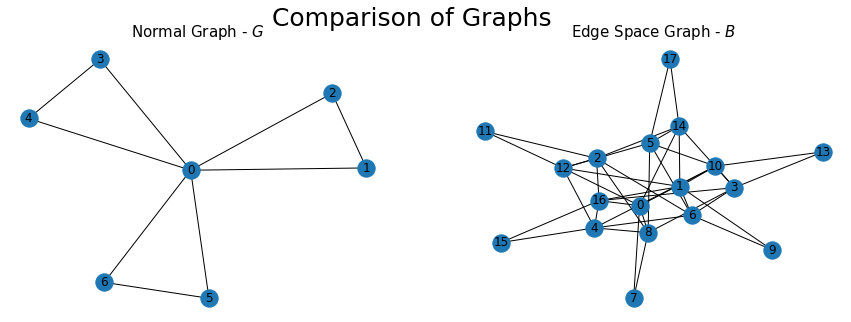

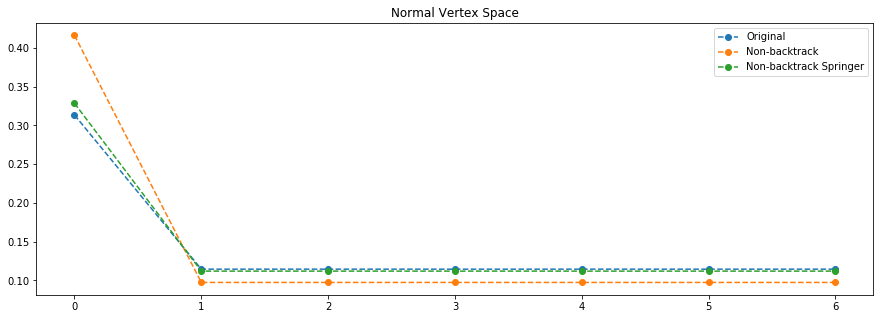

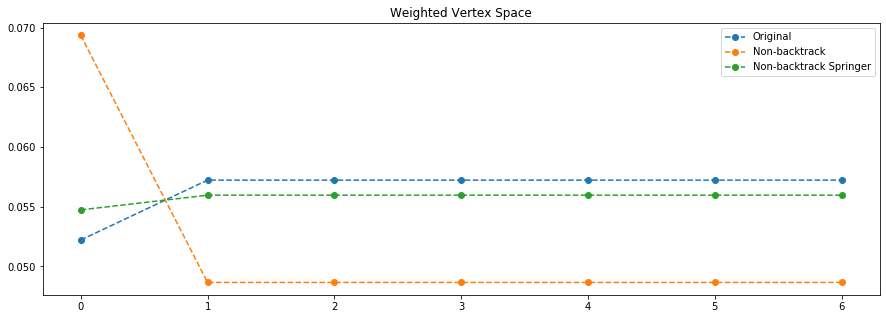

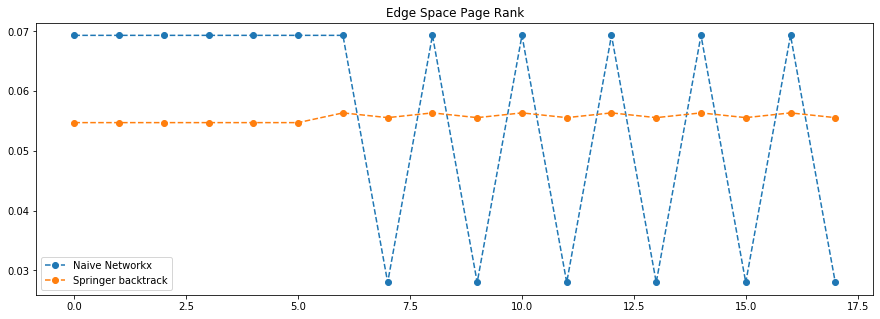

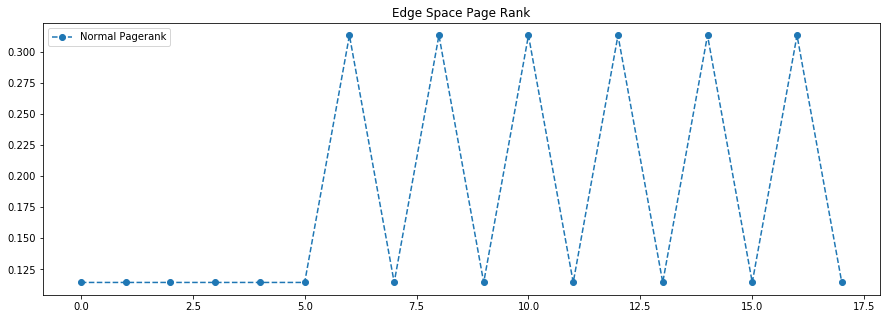



Graph 2: Clear cut on page rank vector.



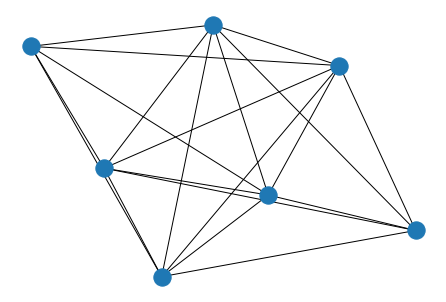

Normal Page Rank Variance: 9.947879897634946e-05
NBTRW Page Rank Variance: 0.00021713110320397628
Regular: 
[0.14916519 0.14916519 0.12708701 0.14916519 0.12708701 0.14916519
 0.14916519]
Non backtracking: 
[0.15217661 0.15217661 0.11955848 0.15217661 0.11955848 0.15217661
 0.15217661]
Non backtracking Springer: 
[0.14975664 0.14975664 0.1256084  0.14975664 0.1256084  0.14975664
 0.14975664]
[2 4 0 1 3 5 6]
[4 2 3 5 6 0 1]
[2 4 3 0 1 5 6]


/Users/tylerjones/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


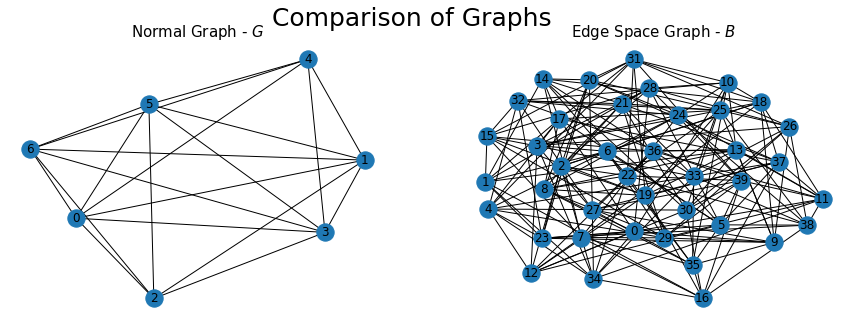

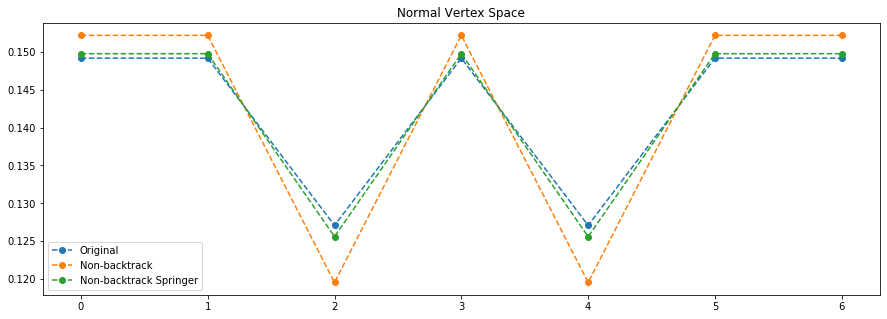

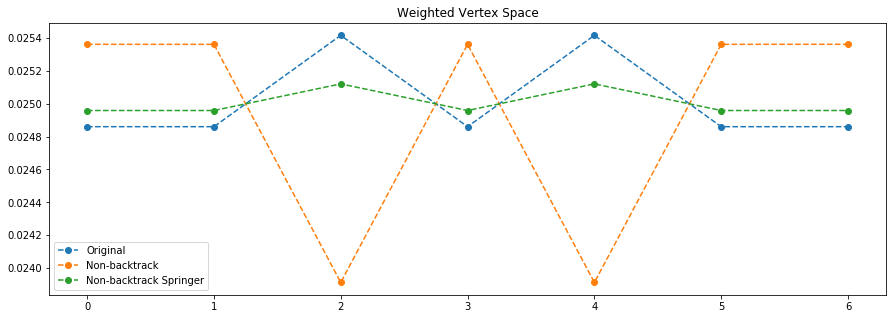

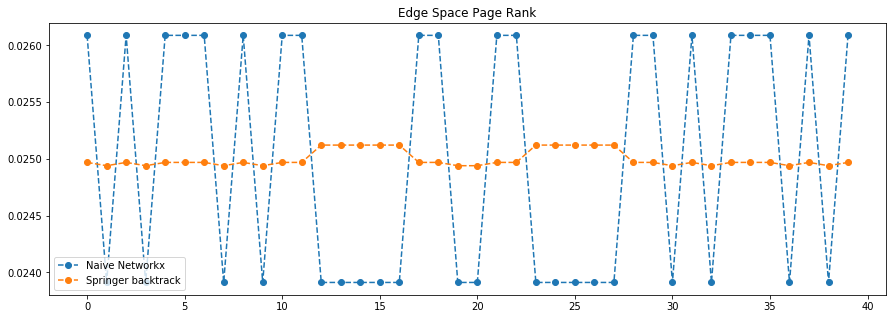

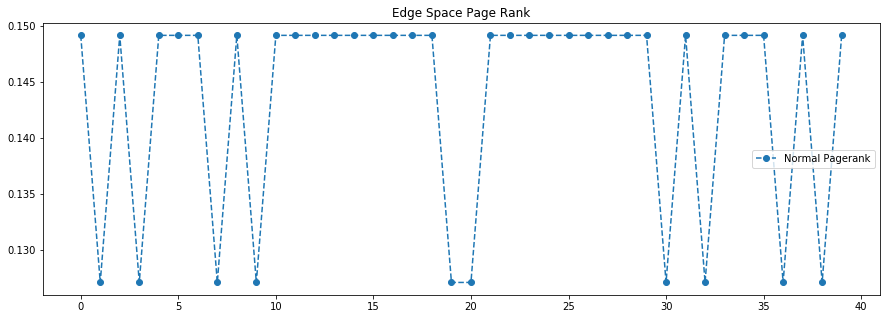



Graph 3: Interesting cycles.



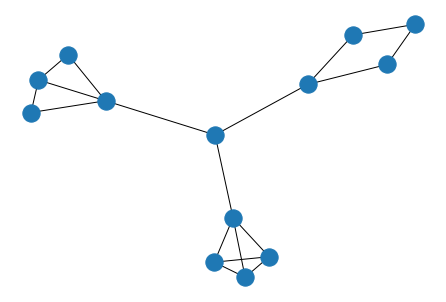

Normal Page Rank Variance: 0.00020622933358042437
NBTRW Page Rank Variance: 0.0007452207053865751
Regular: 
[0.06584202 0.06750614 0.09040669 0.06584202 0.09786448 0.07461818
 0.07461818 0.07461818 0.10764854 0.08386222 0.05817461 0.05817461
 0.08082415]
Non backtracking: 
[0.04792039 0.04134778 0.08542179 0.04792039 0.12616579 0.08265746
 0.08265746 0.08265746 0.1251482  0.07941581 0.05058053 0.05058053
 0.09752639]
Non backtracking Springer: 
[0.05838489 0.05840925 0.08587529 0.05838489 0.1071065  0.08032388
 0.08032388 0.08032388 0.11079057 0.08371039 0.05653431 0.05653431
 0.08329793]
[10 11  0  3  1  5  6  7 12  9  2  4  8]
[ 1  0  3 10 11  9  5  6  7  2 12  8  4]
[10 11  0  3  1  5  6  7 12  9  2  4  8]


/Users/tylerjones/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


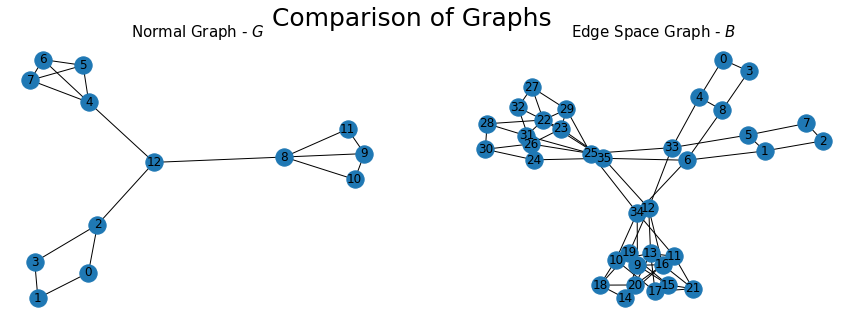

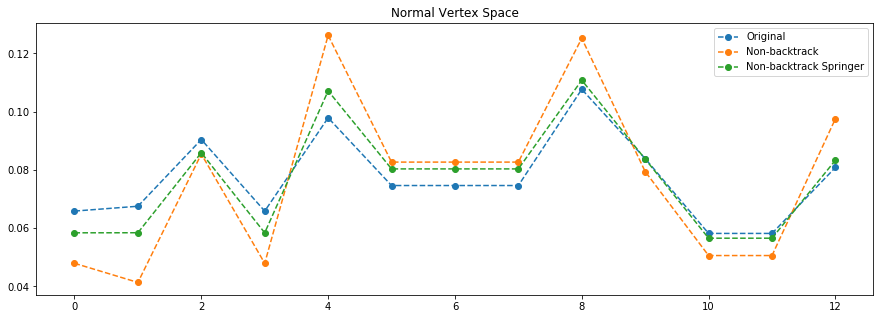

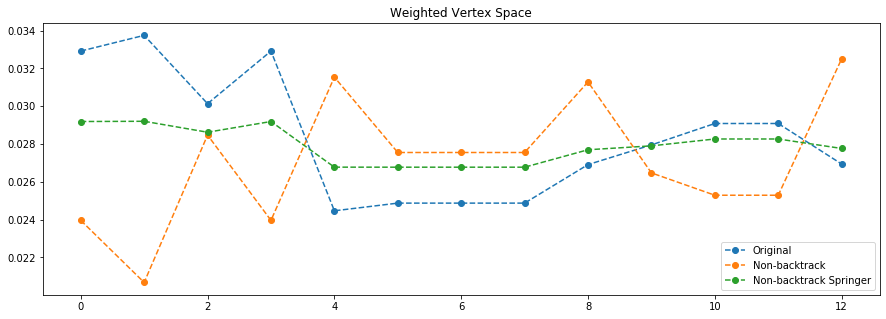

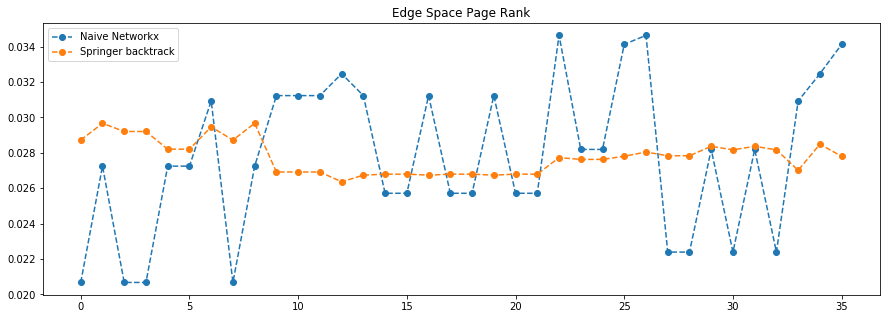

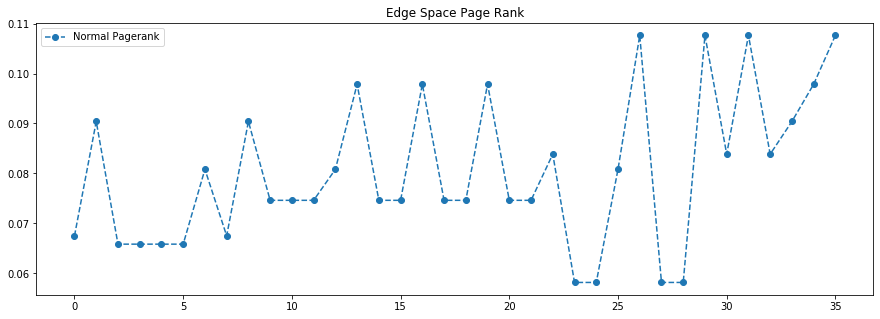

In [5]:
GAO = GraphLibrary('Test_Graphs/GRAPHS')

for i in range(4):
    G, descrip = GAO.load_graph(k=i)

    print(descrip)
    nx.draw(G)
    plt.show()
    run(G)
    print("\n")